In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from numpy.fft import fft,fftshift,ifft
plt.rcParams.update({'font.size': 16})

In [46]:
%matplotlib notebook

In [182]:
d1=25
d2=10
T2=.5
TD=200
SI=TD//2

dt=.01
t=np.arange(TD//2)*dt

f=1/(2*t[1])*np.linspace(-1,1,SI)
f-=np.diff(f[:2])

R=np.cos(2*np.pi*d1*t)*np.exp(-t/T2)
I=np.sin(2*np.pi*d1*t)*np.exp(-t/T2)

RR=np.atleast_2d(R)*np.atleast_2d(np.cos(2*np.pi*d2*t)*np.exp(-t/T2)).T
IR=np.atleast_2d(I)*np.atleast_2d(np.cos(2*np.pi*d2*t)*np.exp(-t/T2)).T
RI=np.atleast_2d(R)*np.atleast_2d(np.sin(2*np.pi*d2*t)*np.exp(-t/T2)).T
II=np.atleast_2d(I)*np.atleast_2d(np.sin(2*np.pi*d2*t)*np.exp(-t/T2)).T

R*=TD
I*=TD

noise=1
R+=np.random.randn(*R.shape)*noise*np.sqrt(TD)
I+=np.random.randn(*I.shape)*noise*np.sqrt(TD)

RR+=np.random.randn(*RR.shape)*noise
IR+=np.random.randn(*IR.shape)*noise
RI+=np.random.randn(*RI.shape)*noise
II+=np.random.randn(*II.shape)*noise

In [183]:
apod=np.cos(np.arange(t.size)/t.size*np.pi/2)**2
apod[:]=1

s0R=fft(apod*np.concatenate((RR[:1]/2+1j*IR[:1]/2,RR[1:]+1j*IR[1:])),SI).T.real
s0I=fft(apod*np.concatenate((RI[:1]/2+1j*II[:1]/2,RI[1:]+1j*II[1:])),SI).T.real

S2D=fftshift(fft(apod*np.concatenate((s0R[:1]/2+1j*s0I[:1]/2,s0R[1:]+1j*s0I[1:])),SI))

S1D=fftshift(fft(apod*np.concatenate((R[:1]+1j*I[:1],R[1:]+1j*I[1:])),SI))

<IPython.core.display.Javascript object>


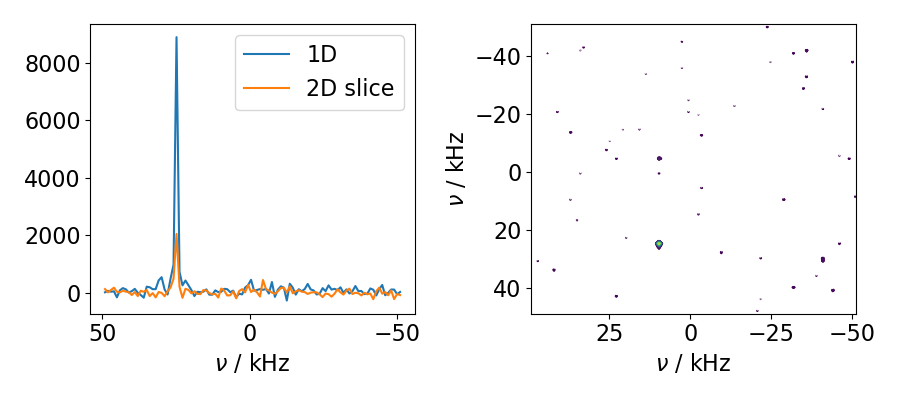

In [188]:
levels=np.logspace(np.log10(S2D.real.max()/8),np.log10(S2D.real.max()),25)
fig,ax=plt.subplots(1,2)
ax[0].plot(f,S1D.real)
ax[0].invert_xaxis()
ax[0].set_xlabel(r'$\nu$ / kHz')
ax[1].contour(f,f,S2D.real,levels=levels)
ax[1].invert_xaxis()
ax[1].invert_yaxis()
ax[1].set_xlabel(r'$\nu$ / kHz')
ax[1].set_ylabel(r'$\nu$ / kHz')
fig.set_size_inches([9,4])
fig.tight_layout()

i=np.argmin(np.abs(f-d2))
ax[0].plot(f,S2D[:,i].real)
# ax[0].plot(f,S2D[:,i].real*2)
ax[0].legend(('1D','2D slice','2D*2'))

<IPython.core.display.Javascript object>


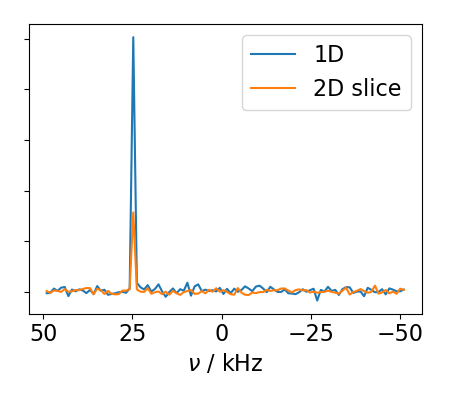

In [179]:
fig,ax=plt.subplots()
ax.plot(f,S1D.real)
ax.plot(f,S2D[:,i].real)
ax.invert_xaxis()
ax.legend(('1D','2D slice'))
ax.set_xlabel(r'$\nu$ / kHz')
ax.set_yticklabels('')
fig.set_size_inches([4.5,4])
fig.tight_layout()


In [157]:
rms1D=np.std(S1D.real[:SI//4])
rms2D=np.std(S2D.real[:SI//4,:SI//4])
max1D=S1D.real.max()
max2D=S2D.real.max()

b1=[np.argmin(np.abs(f-(d1-6))),np.argmin(np.abs(f-(d1+6)))]
int1D=S1D[b1[0]:b1[1]].real.sum()
b2=[np.argmin(np.abs(f-(d2-6))),np.argmin(np.abs(f-(d2+6)))]
int2D=S2D[b1[0]:b1[1],b2[0]:b2[1]].real.sum()

In [158]:
rms1D/rms2D

1.4695520328744247

In [95]:
int2D/int1D

0.5111248279617647

In [96]:
int1D/rms1D

1157.5074068746108

In [97]:
(int1D/rms1D)/(int2D/rms2D)

1.1450016921655484

In [98]:
int2D

1015571.5015483322

In [99]:
TD**2/4

1000000.0

In [100]:
TD

2000

In [101]:
max2D

999918.4361342132

In [102]:
int2D/rms2D

1010.922005438621

In [103]:
int1D/rms1D

1157.5074068746108

In [104]:
rms2D

1004.5992629349223

In [105]:
rms1D

1716.563008264736

In [127]:
rms1D/rms2D

1.2563367839917938

In [107]:
S2D.shape

(1000, 1000)

In [108]:
TD

2000

In [109]:
int2D/max2D

1.0156543422427886

In [110]:
int1D/max1D

0.9945526916100448